# Car Purchasing Amount Prediction

Car Purchasing Amount Prediction using RandomForestRegressor

__Features of the Dataset__

- __Customer Name:__ This column likely contains the names of the customers. It identifies each individual uniquely or may serve as a reference for the customer.

- __Customer e-mail:__ This column likely contains the email addresses of the customers. It's a unique identifier for each customer's email.

- __Country:__ This column probably indicates the country in which the customer resides. It provides geographical information about the customer.

- __Gender:__ This column likely represents the gender of each customer. It could be categorized as 'Male' or 'Female' or use numerical encoding like '0' for Male and '1' for Female.

- __Age:__ This column likely represents the age of each customer. It provides information about the demographic distribution of the customers.

- __Annual Salary:__ This column probably contains the annual salary of each customer. It gives an indication of the financial status of the customer.

- __Credit Card Debt:__ This column likely represents the amount of credit card debt that each customer has. It provides information about the financial liabilities of the customers.

- __Net Worth:__ This column probably represents the net worth of each customer. It could include assets minus liabilities and provides an overall measure of the customer's wealth.

- __Car Purchase Amount:__ This column is likely the target variable in a machine learning context. It represents the amount spent by each customer on a car purchase. This is the variable you might want to predict based on the other features in the dataset.

__Importing Libraries__

In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings("ignore")

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

__Loading the Dataset__

In [2]:
data = pd.read_csv(r'Car_Purchasing_Data.csv')
data.head()

,Customer Name,Customer e-mail,Country,Gender,Age,Annual Salary,Credit Card Debt,Net Worth,Car Purchase Amount
0,Martina Avila,cubilia.Curae.Phasellus@quisaccumsanconvallis.edu,USA,0,42,62812.09301,11609.380910,238961.2505,35321.45877
1,Harlan Barnes,eu.dolor@diam.co.uk,USA,0,41,66646.89292,9572.957136,530973.9078,45115.52566
2,Naomi Rodriquez,vulputate.mauris.sagittis@ametconsectetueradip...,USA,1,43,53798.55112,11160.355060,638467.1773,42925.70921
3,Jade Cunningham,malesuada@dignissim.com,USA,1,58,79370.03798,14426.164850,548599.0524,67422.36313
4,Cedric Leach,felis.ullamcorper.viverra@egetmollislectus.net,USA,1,57,59729.15130,5358.712177,560304.0671,55915.46248


In [3]:
data.shape #Checking the shape of the dataset

(500, 9)

In [4]:
data.info() #Checking information of data for the dtypes of each column

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Customer Name        500 non-null    object 
 1   Customer e-mail      500 non-null    object 
 2   Country              500 non-null    object 
 3   Gender               500 non-null    int64  
 4   Age                  500 non-null    int64  
 5   Annual Salary        500 non-null    float64
 6   Credit Card Debt     500 non-null    float64
 7   Net Worth            500 non-null    float64
 8   Car Purchase Amount  500 non-null    float64
dtypes: float64(4), int64(2), object(3)
memory usage: 35.3+ KB


In [5]:
data.isna().sum() #Checking for null values

Customer Name          0
Customer e-mail        0
Country                0
Gender                 0
Age                    0
Annual Salary          0
Credit Card Debt       0
Net Worth              0
Car Purchase Amount    0
dtype: int64

In [6]:
data['Country'].value_counts() 

Country
USA    500
Name: count, dtype: int64

In [7]:
data['Gender'].value_counts()

Gender
1    253
0    247
Name: count, dtype: int64

There are 253 males and 247 females in tnis data

In [8]:
data['Age'].unique() #Unique ages

array([42, 41, 43, 58, 57, 47, 50, 53, 44, 48, 55, 45, 52, 59, 46, 40, 28,
       56, 33, 51, 22, 38, 39, 61, 37, 34, 32, 49, 36, 30, 35, 54, 62, 60,
       63, 70, 64, 65, 29, 27, 31, 20, 25], dtype=int64)

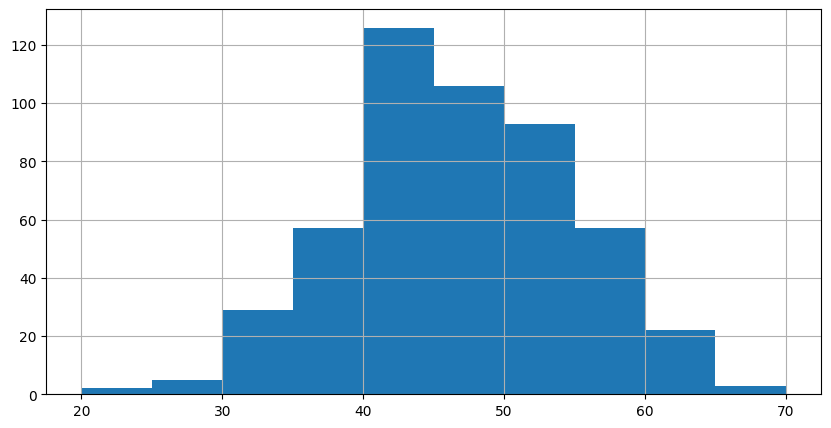

In [9]:
data['Age'].hist(figsize=(10,5))
plt.show()

<Axes: >

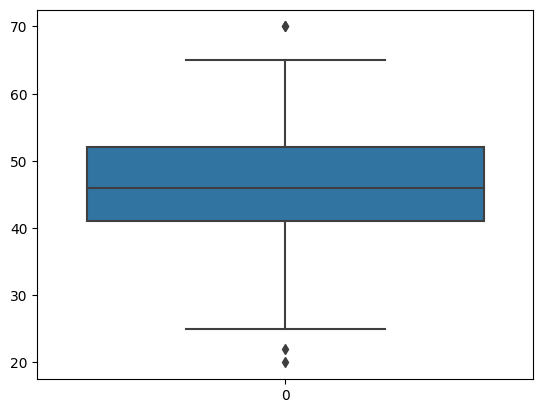

In [10]:
sb.boxplot(data.Age)

<BarContainer object of 500 artists>

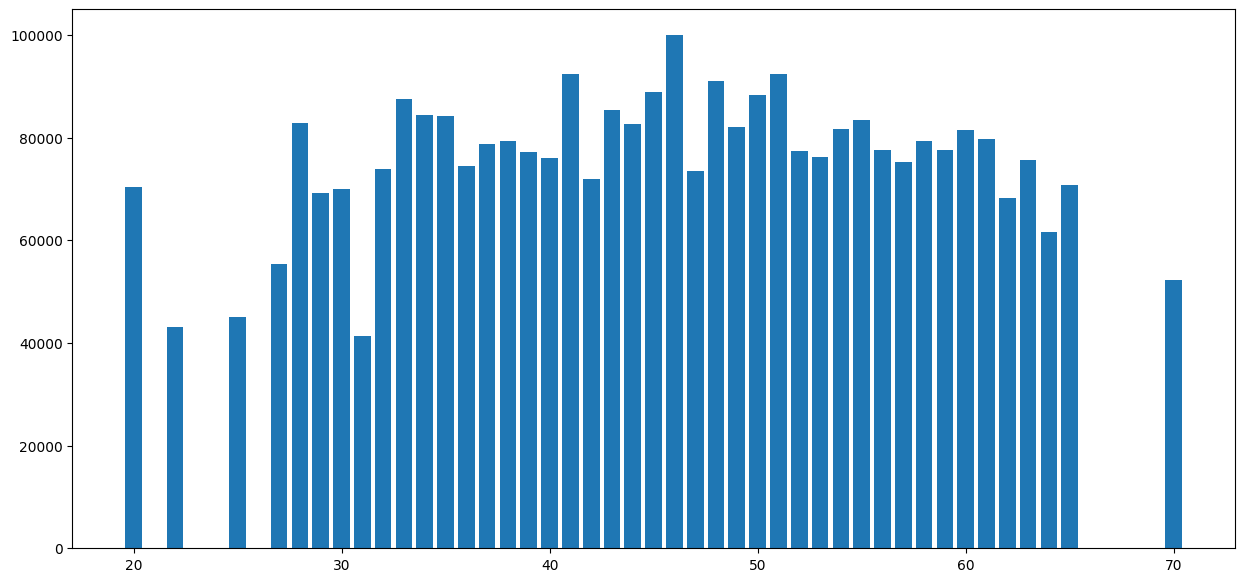

In [11]:
plt.figure(figsize=(15,7))
plt.bar(data['Age'],data['Annual Salary'])

<BarContainer object of 500 artists>

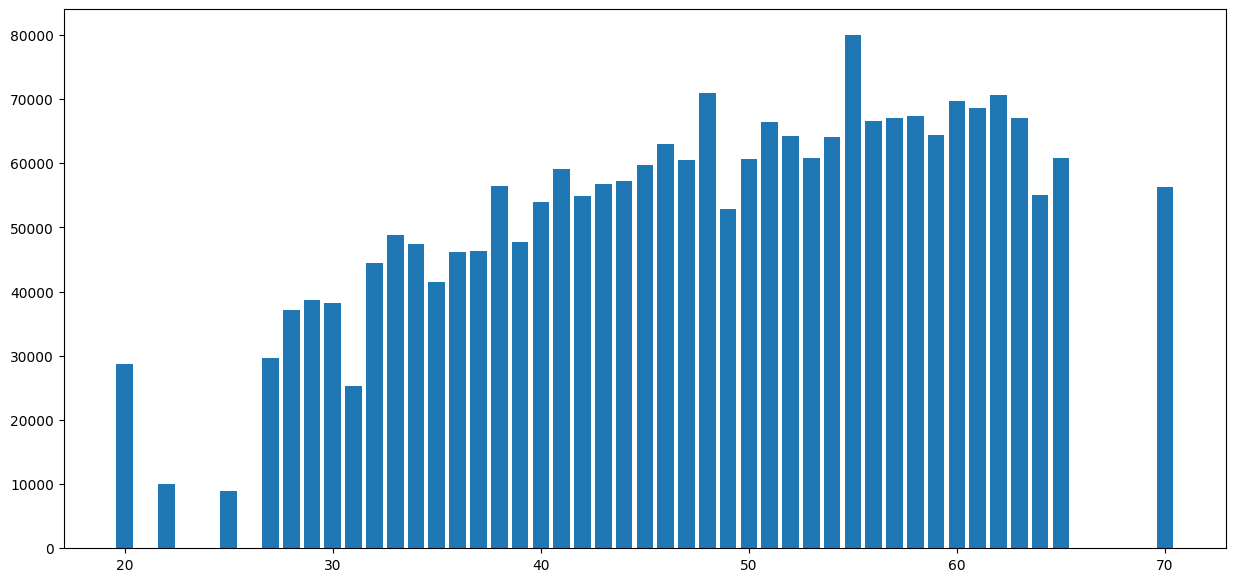

In [12]:
plt.figure(figsize=(15,7))
plt.bar(data['Age'],data['Car Purchase Amount'])

In [13]:
f = data.loc[data['Gender']==0]

<Axes: xlabel='Car Purchase Amount', ylabel='Count'>

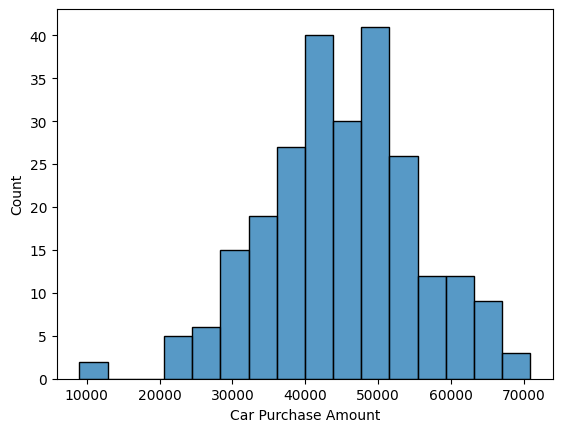

In [14]:
sb.histplot(data=f,x='Car Purchase Amount')

In [15]:
m = data.loc[data['Gender']==1]

<Axes: xlabel='Car Purchase Amount', ylabel='Count'>

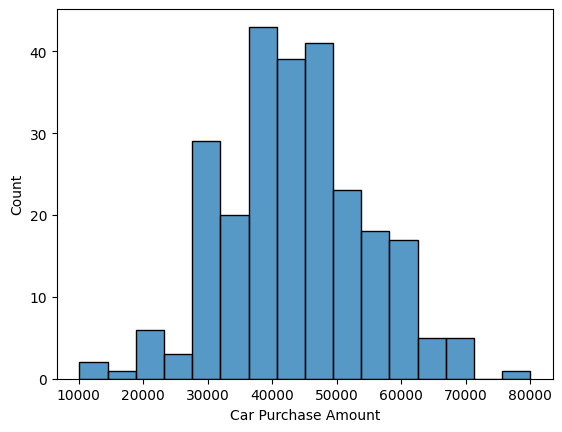

In [16]:
sb.histplot(data=m,x='Car Purchase Amount')

**Model Building**

In [17]:
X = data.drop(['Customer Name','Customer e-mail','Country','Car Purchase Amount'],axis=1)
Y = data['Car Purchase Amount']

In [18]:
X_train,X_test,Y_train,Y_test = train_test_split(X, Y, test_size=0.22,random_state=42)

In [19]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(390, 5)
(110, 5)
(390,)
(110,)


In [20]:
from sklearn.model_selection import GridSearchCV

rfr = RandomForestRegressor()
n_estimators = [25,50,75,100,125,150,175,200]
max_depth = [3,5,10]
criterion = ['friedman_mse']
parameters = {'n_estimators':n_estimators,'criterion':criterion,'max_depth':max_depth}
RFC_reg = GridSearchCV(rfr,parameters)
RFC_reg.fit(X_train,Y_train)

GridSearchCV(estimator=RandomForestRegressor(),
             param_grid={'criterion': ['friedman_mse'], 'max_depth': [3, 5, 10],
                         'n_estimators': [25, 50, 75, 100, 125, 150, 175, 200]})

In [21]:
RFC_reg.best_params_

{'criterion': 'friedman_mse', 'max_depth': 10, 'n_estimators': 150}

In [22]:
y_predict = RFC_reg.predict(X_test)

In [23]:
y_predict

array([45146.22341436, 44941.05238463, 63818.5234651 , 34957.9699814 ,
       57455.14868873, 59916.42894387, 51420.37872366, 53448.65496088,
       50178.61868223, 46737.67288208, 37242.84840829, 44642.84680071,
       44365.57072746, 39030.6436734 , 41191.19513031, 53760.41544125,
       48515.71768918, 18847.94600002, 57913.38219203, 47405.8886168 ,
       42283.88508102, 51946.25544338, 51603.02465557, 37792.8423053 ,
       39817.61352649, 39051.31999216, 61945.45021427, 49289.51181028,
       23062.31751219, 52039.34172059, 55815.93412195, 47730.88724216,
       41078.20830353, 53582.14562038, 42278.04037644, 39441.99595087,
       59393.32670078, 30398.65446785, 42328.21723856, 39687.01603319,
       53863.50240411, 59677.09961204, 46758.62440783, 38209.46662672,
       52753.51705192, 42111.83356612, 37361.70315436, 40290.7565575 ,
       51734.71022557, 46877.72178356, 43377.01811394, 34024.80040175,
       38788.43692405, 42045.37287082, 45499.04899931, 46657.43048663,
      

In [24]:
from sklearn.metrics import r2_score
r2_score(Y_test,y_predict)

0.9572230367918632

In [25]:
result = pd.DataFrame(columns=['Actual','Predicted'])
result['Actual'] = Y_test
result['Predicted'] = y_predict
result = result.reset_index()
result['Id'] = result.index

In [26]:
result.head()

,index,Actual,Predicted,Id
0,361,46082.80993,45146.223414,0
1,73,45058.89690,44941.052385,1
2,374,63079.84329,63818.523465,2
3,155,31837.22537,34957.969981,3
4,104,60461.24268,57455.148689,4


[]

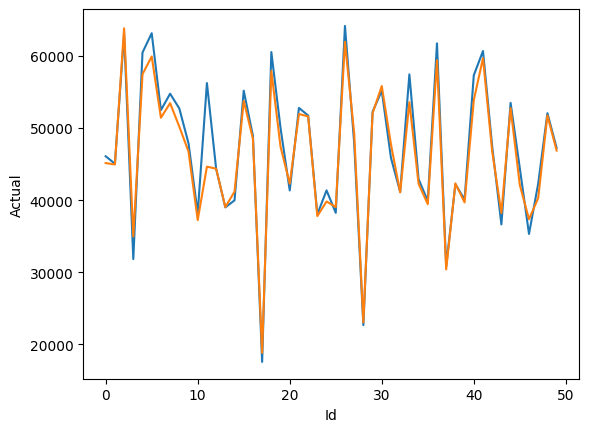

In [27]:
sb.lineplot(x='Id',y='Actual',data=result.head(50)) #Actual - Blue
sb.lineplot(x='Id',y='Predicted',data=result.head(50)) #Predicted - orange
plt.plot()

[]

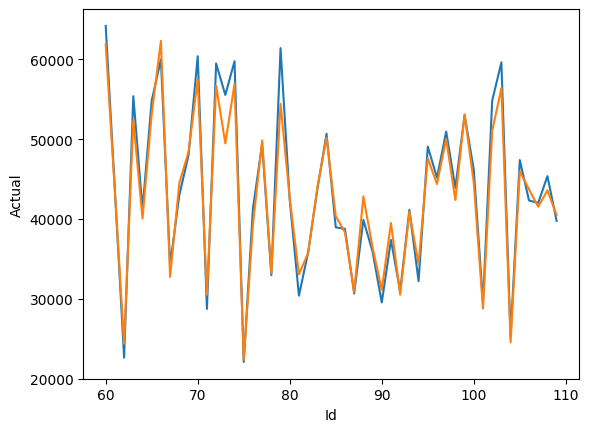

In [28]:
sb.lineplot(x='Id',y="Actual",data=result.tail(50)) #Actual - Blue
sb.lineplot(x='Id',y='Predicted',data=result.tail(50)) #Predicted - Orange
plt.plot()